In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/average-time-spent-by-a-user-on-social-media/dummy_data.csv


In [4]:
df = pd.read_csv("/kaggle/input/average-time-spent-by-a-user-on-social-media/dummy_data.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           1000 non-null   int64 
 1   gender        1000 non-null   object
 2   time_spent    1000 non-null   int64 
 3   platform      1000 non-null   object
 4   interests     1000 non-null   object
 5   location      1000 non-null   object
 6   demographics  1000 non-null   object
 7   profession    1000 non-null   object
 8   income        1000 non-null   int64 
 9   indebt        1000 non-null   bool  
 10  isHomeOwner   1000 non-null   bool  
 11  Owns_Car      1000 non-null   bool  
dtypes: bool(3), int64(3), object(6)
memory usage: 73.4+ KB


In [6]:
df.head()

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True


In [7]:
df.describe(include="all")

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
count,1000.000000,1000,1000.000000,1000,1000,1000,1000,1000,1000.000000,1000,1000,1000
unique,NaN,3,NaN,3,3,3,3,3,NaN,2,2,2
top,NaN,male,NaN,Instagram,Lifestlye,Australia,Rural,Marketer Manager,NaN,False,True,True
freq,NaN,337,NaN,363,341,352,340,355,NaN,503,508,539
mean,40.986000,NaN,5.029000,NaN,NaN,NaN,NaN,NaN,15014.823000,NaN,NaN,NaN
std,13.497852,NaN,2.537834,NaN,NaN,NaN,NaN,NaN,2958.628221,NaN,NaN,NaN
min,18.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,10012.000000,NaN,NaN,NaN
25%,29.000000,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,12402.250000,NaN,NaN,NaN
50%,42.000000,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,14904.500000,NaN,NaN,NaN
75%,52.000000,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,17674.250000,NaN,NaN,NaN


In [8]:
df.isnull().sum()

age             0
gender          0
time_spent      0
platform        0
interests       0
location        0
demographics    0
profession      0
income          0
indebt          0
isHomeOwner     0
Owns_Car        0
dtype: int64

In [9]:
df.duplicated(keep='last').sum()

0

<Axes: title={'center': 'Distribution of Ages'}, ylabel='Frequency'>

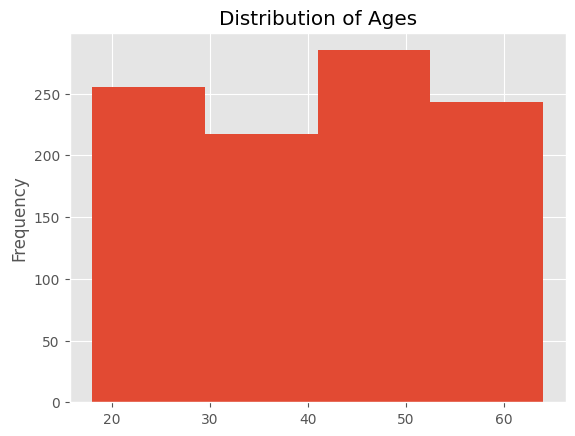

In [15]:
plt.style.use("ggplot")
df.age.plot.hist(title="Distribution of Ages",bins=4)

There is a uniform distribution of age.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Density'>

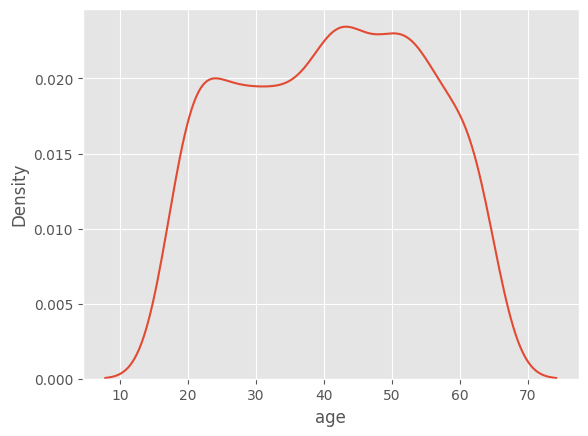

In [20]:
sns.kdeplot(df.age)

<Axes: title={'center': 'Proportion of Genders'}>

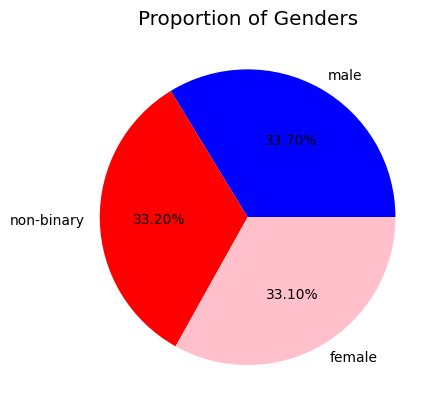

In [18]:
df.gender.value_counts().plot.pie(ylabel="",title="Proportion of Genders", colors=['blue','red','pink'], autopct="%.2f%%")

Gender is somewhat evenly distributed.

<Axes: title={'center': 'Distrution of time spent'}, ylabel='Frequency'>

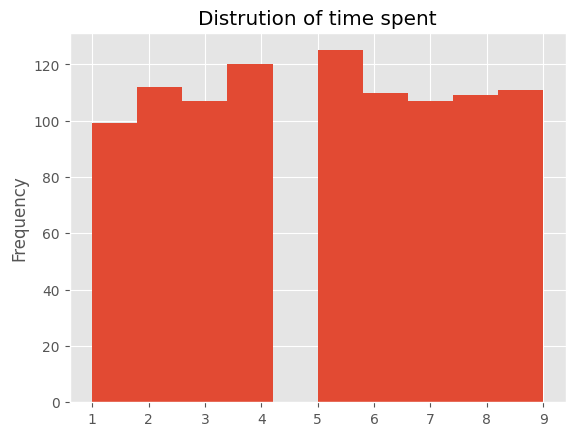

In [19]:
df.time_spent.plot.hist(title="Distrution of time spent")

<Axes: title={'center': 'Instagram is the most popular platform'}>

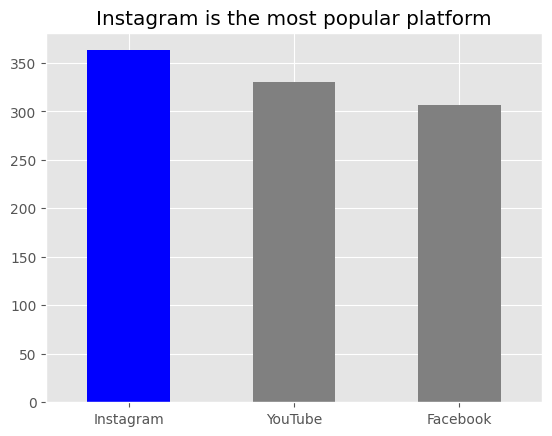

In [26]:
df.platform.value_counts(ascending=False).plot.bar(rot=360, xlabel="", color=['blue','grey','grey'], title="Instagram is the most popular platform")

<Axes: title={'center': 'Lifestyle is the most popular interest'}>

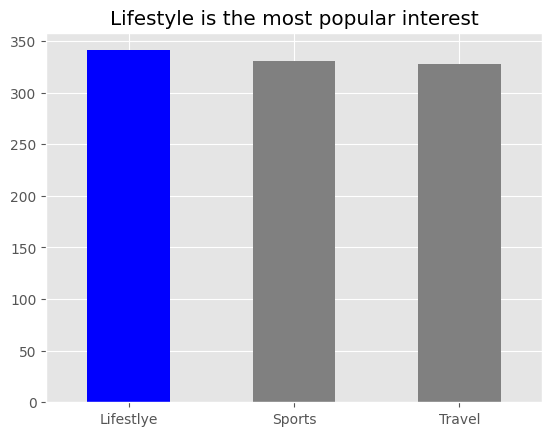

In [29]:
df.interests.value_counts(ascending=False).plot.bar(title="Lifestyle is the most popular interest", rot=360, xlabel='', color=['blue','grey','grey'])

<Axes: title={'center': 'Australia is the most popular location'}>

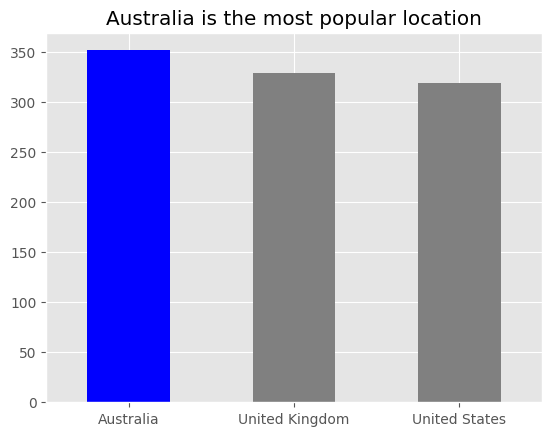

In [32]:
df.location.value_counts(ascending=False).plot.bar(title="Australia is the most popular location",color=['blue','grey','grey'],xlabel='',rot=360)

<Axes: title={'center': 'Rural areas are the most popular'}>

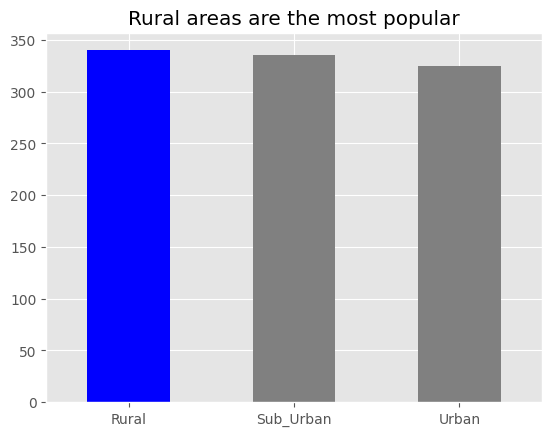

In [34]:
df.demographics.value_counts(ascending=False).plot.bar(xlabel="",rot=360, color=['blue','grey','grey'], title="Rural areas are the most popular")

<Axes: title={'center': 'Marketer Manager is the most popular profession'}>

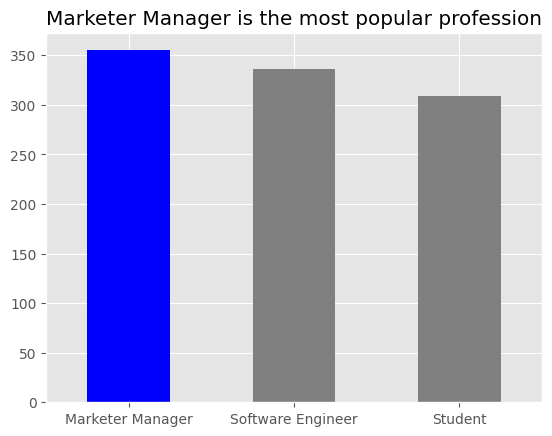

In [36]:
df.profession.value_counts(ascending=False).plot.bar(xlabel="",rot=360, title="Marketer Manager is the most popular profession", color=['blue','grey','grey'])

<Axes: title={'center': 'Uniform Distribution of Incomes'}, ylabel='Frequency'>

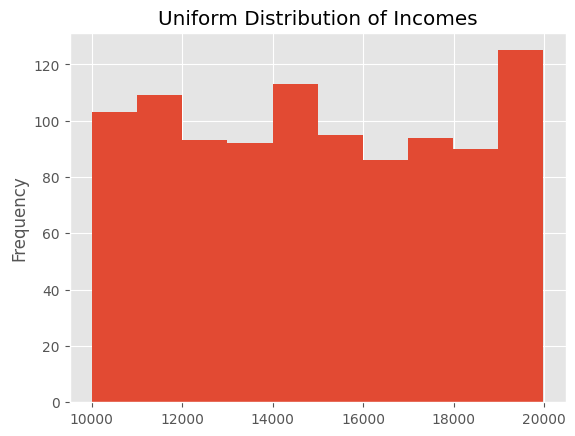

In [38]:
df.income.plot.hist(title="Uniform Distribution of Incomes")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Uniform Distribution of Income')

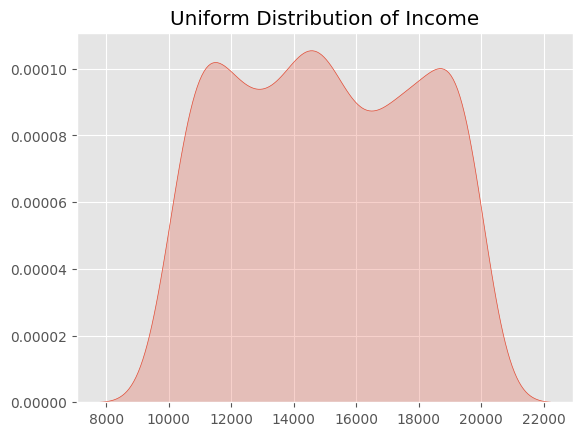

In [44]:
sns.kdeplot(df.income,fill=True)
plt.ylabel("")
plt.xlabel("")
plt.title("Uniform Distribution of Income")

In [45]:
df.columns

Index(['age', 'gender', 'time_spent', 'platform', 'interests', 'location',
       'demographics', 'profession', 'income', 'indebt', 'isHomeOwner',
       'Owns_Car'],
      dtype='object')

In [48]:
df.indebt.value_counts()

indebt
False    503
True     497
Name: count, dtype: int64

In [49]:
df.isHomeOwner.value_counts()

isHomeOwner
True     508
False    492
Name: count, dtype: int64

<Axes: title={'center': 'Many more people own a car'}>

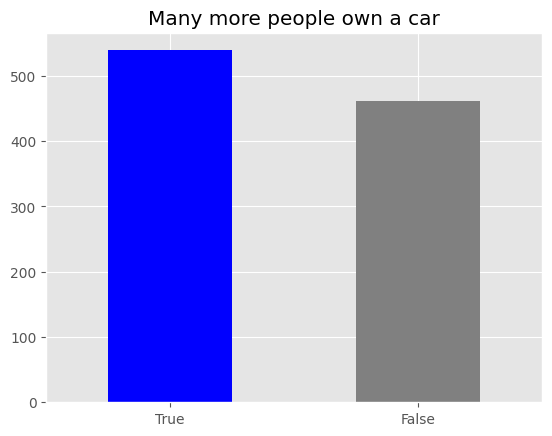

In [53]:
df.Owns_Car.value_counts().plot.bar(rot=360, color=['blue','grey'], xlabel="", title="Many more people own a car")

In [54]:
from scipy.stats import chi2_contingency

In [57]:
chi2,pval,dof,exp = chi2_contingency(pd.crosstab(df.gender,df.platform))
if pval<0.05:
    print("There is an association between gender and the social media platform")
else:
    print("There is no association between gender and the social media platform")

There is an association between gender and the social media platform


In [72]:
pd.crosstab(index=df.gender,columns=df.platform)/pd.crosstab(index=df.gender,columns=df.platform, margins=True).iloc[-1]*100

platform,All,Facebook,Instagram,YouTube
gender,,,,
female,NaN,27.687296,37.190083,33.636364
male,NaN,36.807818,35.261708,29.090909
non-binary,NaN,35.504886,27.548209,37.272727


## From the percentage distribtion of genders per platform, Males make the majority Facebook users, Females make the majority of Instagram users, Non-Binaries make the majority of YouTube users.

<Axes: title={'center': 'Females have the highest average income'}>

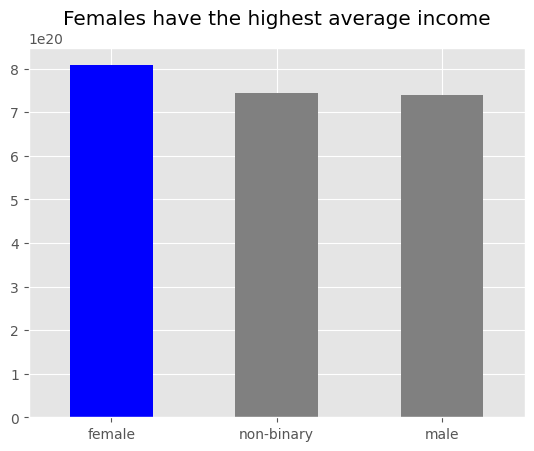

In [82]:
x= df.groupby('gender')['income'].mean()**5
x.sort_values(ascending=False).plot.bar(rot=360, xlabel="", color=['blue','grey','grey'], title="Females have the highest average income")

<Axes: title={'center': 'Median Income per Gender'}>

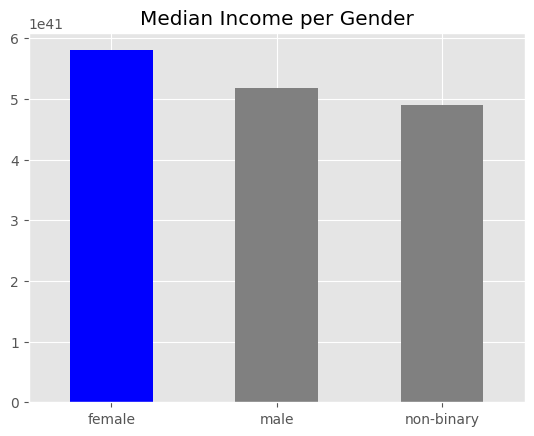

In [87]:
y= df.groupby('gender')['income'].median()**10
y.plot.bar(rot=360,xlabel="", color=['blue','grey','grey'],title="Median Income per Gender")

In [98]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [99]:
result = pairwise_tukeyhsd(df.income,df.gender)
print(result)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1   group2    meandiff p-adj    lower    upper   reject
------------------------------------------------------------
female       male -266.1502 0.4761 -803.6472 271.3468  False
female non-binary -244.7433 0.5362 -784.2421 294.7555  False
  male non-binary   21.4069 0.9952 -515.6815 558.4954  False
------------------------------------------------------------


There is no association between genders and income. Difference is by chance.

In [102]:
chi2,pval,dof,exp = chi2_contingency(pd.crosstab(df.profession,df.interests))
if pval<0.05:
    print("There is an association between Profession and Interest")
else:
    print("There is no association between Profession and Interest")

There is no association between Profession and Interest


In [103]:
result = pairwise_tukeyhsd(df.income, df.profession)
print(result)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1            group2      meandiff p-adj    lower    upper   reject
-----------------------------------------------------------------------------
 Marketer Manager Software Engineer -50.8233 0.9723 -579.0519 477.4053  False
 Marketer Manager           Student 338.3962 0.3053 -201.5585 878.3508  False
Software Engineer           Student 389.2195 0.2172 -157.7935 936.2325  False
-----------------------------------------------------------------------------


## There is no association between Profession and Income.

In [104]:
df.columns

Index(['age', 'gender', 'time_spent', 'platform', 'interests', 'location',
       'demographics', 'profession', 'income', 'indebt', 'isHomeOwner',
       'Owns_Car'],
      dtype='object')

In [107]:
df.age.value_counts(bins=3)

(48.667, 64.0]      344
(17.953, 33.333]    331
(33.333, 48.667]    325
Name: count, dtype: int64

In [108]:
df['age_category'] = pd.cut(df.age,bins=[float('-inf'),34,45,float('inf')], labels=['Young','Middle-Age','Old'])

/tmp/ipykernel_33/1899200851.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_category')['time_spent'].mean().sort_values(ascending=False).plot.bar(rot=360,color=['blue','grey','grey'],xlabel="", title="Average time spent for different age groups")


<Axes: title={'center': 'Average time spent for different age groups'}>

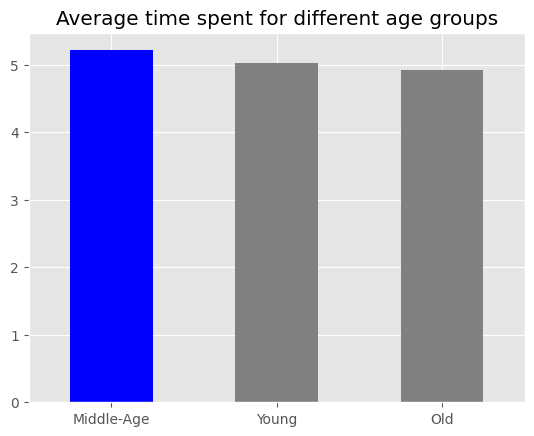

In [113]:
df.groupby('age_category')['time_spent'].mean().sort_values(ascending=False).plot.bar(rot=360,color=['blue','grey','grey'],xlabel="", title="Average time spent for different age groups")

Middle-Age users spend the most time on social media.
Going to check if this is by chance.

In [114]:
result = pairwise_tukeyhsd(df.time_spent,df.age_category)
print(result)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
  group1   group2 meandiff p-adj   lower  upper  reject
-------------------------------------------------------
Middle-Age    Old  -0.2905 0.3337 -0.7726 0.1915  False
Middle-Age  Young   -0.185 0.6538 -0.6792 0.3091  False
       Old  Young   0.1055 0.8365 -0.3295 0.5405  False
-------------------------------------------------------


## The difference in time_spent between the age groups is by chance.

<Axes: title={'center': 'Females Spend the highest time on social-media on average'}>

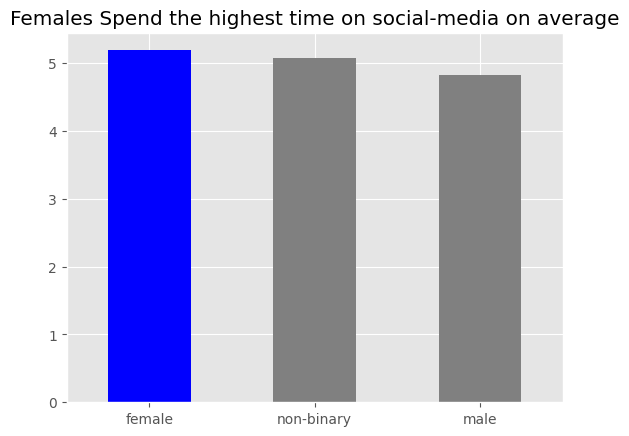

In [118]:
df.groupby('gender')['time_spent'].mean().sort_values(ascending=False).plot.bar(rot=360, xlabel="",title="Females Spend the highest time on social-media on average", color=['blue','grey','grey'])

Going to check if this observation is by chance.

In [119]:
result = pairwise_tukeyhsd(df.time_spent,df.gender)
print(result)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2   meandiff p-adj   lower  upper  reject
-------------------------------------------------------
female       male  -0.3684 0.1458  -0.829 0.0922  False
female non-binary   -0.112 0.8368 -0.5743 0.3503  False
  male non-binary   0.2564 0.3913 -0.2039 0.7166  False
-------------------------------------------------------


## Females do spend the most time on average on social media  according to this dataset, but it is by chance and not statistically significant

In [120]:
result = pairwise_tukeyhsd(df.time_spent,df.location)
print(result)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1         group2     meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------
     Australia United Kingdom  -0.3099 0.2489 -0.7665 0.1466  False
     Australia  United States  -0.2752 0.3395 -0.7354 0.1851  False
United Kingdom  United States   0.0348 0.9834 -0.4331 0.5026  False
-------------------------------------------------------------------


<Axes: title={'center': 'Average time spent per Country'}>

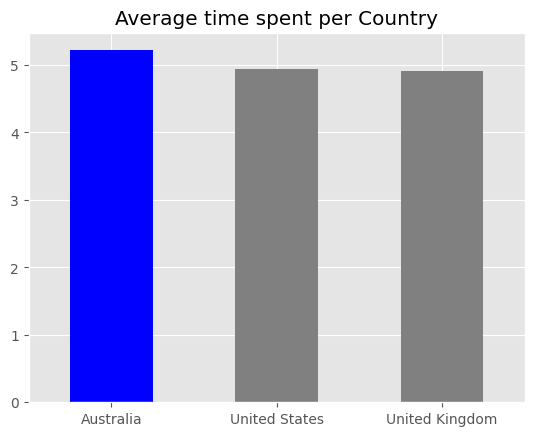

In [128]:
df.groupby('location')['time_spent'].mean().sort_values(ascending=False).plot.bar(rot=360, xlabel="",title='Average time spent per Country',color=['blue','grey','grey'])

Difference in average time spent per Country is by chance.

In [124]:
result = pairwise_tukeyhsd(df.time_spent,df.demographics)
print(result)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    Rural Sub_Urban   0.2511 0.4025 -0.2066  0.7087  False
    Rural     Urban  -0.2329 0.4622 -0.6941  0.2283  False
Sub_Urban     Urban  -0.4839  0.038 -0.9468 -0.0211   True
----------------------------------------------------------


There is an association between time spent in Sub-Urban and Urban areas. This means the areas show no difference in time spent.